In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import scipy.ndimage as ndi 

In [2]:

train_dir = '/Users/chamidiperera/Documents/Care/careBackEnd/Datasets/train'
validation_dir = '/Users/chamidiperera/Documents/Care/careBackEnd/Datasets/valid'
test_dir = '/Users/chamidiperera/Documents/Care/careBackEnd/Datasets/test'

In [3]:

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 12447 images belonging to 8 classes.


In [5]:

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 888 images belonging to 8 classes.


In [6]:

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 562 images belonging to 8 classes.


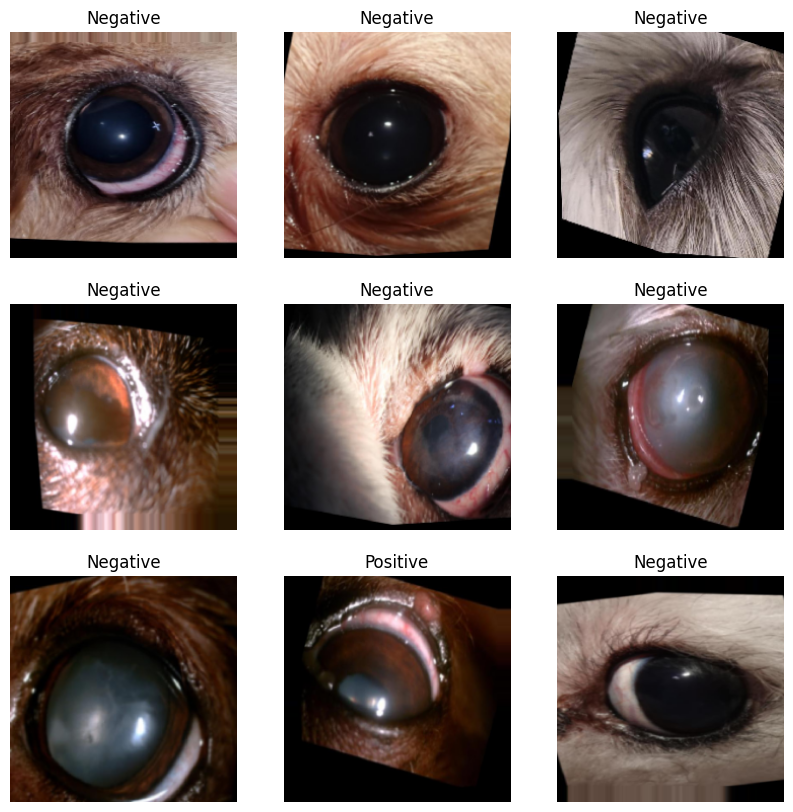

In [9]:

batch = train_generator.next()  
images, labels = batch[0], batch[1]

label_names = ['Negative', 'Positive']  

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    
    label = label_names[int(labels[i][0])]  
    
    plt.title(label)
    plt.axis("off")
plt.show()


In [10]:

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 7s 1us/step


In [11]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [12]:

history = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[early_stop])

Epoch 1/20
389/389 [==============================] - 118s 300ms/step - loss: 1.6303 - accuracy: 0.3602 - val_loss: 1.2515 - val_accuracy: 0.5282
Epoch 2/20
389/389 [==============================] - 129s 330ms/step - loss: 1.3364 - accuracy: 0.4509 - val_loss: 1.1601 - val_accuracy: 0.5428
Epoch 3/20
389/389 [==============================] - 137s 351ms/step - loss: 1.2561 - accuracy: 0.4834 - val_loss: 1.1348 - val_accuracy: 0.5777
Epoch 4/20
389/389 [==============================] - 139s 356ms/step - loss: 1.2209 - accuracy: 0.4980 - val_loss: 1.1114 - val_accuracy: 0.5664
Epoch 5/20
389/389 [==============================] - 147s 378ms/step - loss: 1.1830 - accuracy: 0.5066 - val_loss: 1.0868 - val_accuracy: 0.5698
Epoch 6/20
389/389 [==============================] - 153s 393ms/step - loss: 1.1634 - accuracy: 0.5131 - val_loss: 1.1147 - val_accuracy: 0.5563
Epoch 7/20
389/389 [==============================] - 144s 370ms/step - loss: 1.1425 - accuracy: 0.5279 - val_loss: 1.0700 -

In [13]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

18/18 [==============================] - 4s 228ms/step - loss: 1.0494 - accuracy: 0.5801
Test Accuracy: 0.5800711512565613


In [16]:

model.save('MobileNetV2_multi.h5')

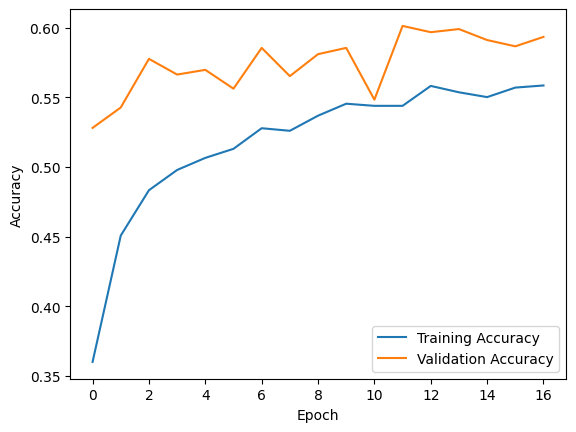

In [14]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()